<a href="https://colab.research.google.com/github/ccarpenterg/introNLP/blob/master/03a_NLP_and_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP and Recurrent Neural Networks

In [1]:
# load Tensorflow 2
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow import keras

import tensorflow_datasets as tfds
import numpy as np

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True
)

In [0]:
encoder = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 5000
BATCH_SIZE = 32

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data))
)

test_batches = (
    test_data
    .padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))
)

In [5]:
for batch_example, labels in train_batches.take(2):
    print("Batch shape:", batch_example.shape)
    print("Labels shape:", labels.shape)

Batch shape: (32, 756)
Labels shape: (32,)
Batch shape: (32, 1259)
Labels shape: (32,)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [8]:
training_results = model.fit(train_batches, epochs=10,
                             validation_data=test_batches,
                             validation_steps=30)

Epoch 1/10
782/782 [==============================] - 81s 103ms/step - loss: 0.5785 - accuracy: 0.6574 - val_loss: 0.4363 - val_accuracy: 0.8000
Epoch 2/10
782/782 [==============================] - 74s 94ms/step - loss: 0.3099 - accuracy: 0.8784 - val_loss: 0.3423 - val_accuracy: 0.8562
Epoch 3/10
782/782 [==============================] - 73s 94ms/step - loss: 0.2367 - accuracy: 0.9144 - val_loss: 0.2978 - val_accuracy: 0.8781
Epoch 4/10
782/782 [==============================] - 73s 93ms/step - loss: 0.2021 - accuracy: 0.9296 - val_loss: 0.3248 - val_accuracy: 0.8792
Epoch 5/10
782/782 [==============================] - 74s 94ms/step - loss: 0.1771 - accuracy: 0.9394 - val_loss: 0.3155 - val_accuracy: 0.8760
Epoch 6/10
782/782 [==============================] - 75s 95ms/step - loss: 0.1603 - accuracy: 0.9460 - val_loss: 0.3579 - val_accuracy: 0.8677
Epoch 7/10
782/782 [==============================] - 75s 96ms/step - loss: 0.1497 - accuracy: 0.9502 - val_loss: 0.3747 - val_accuracy

In [10]:
test_loss, test_accuracy = model.evaluate(test_batches)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_accuracy))

    782/Unknown - 28s 36ms/step - loss: 0.4695 - accuracy: 0.8547Test Loss: 0.4695016444825074
Test Accuracy: 0.8547199964523315


In [11]:
training_dict = training_results.history
training_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

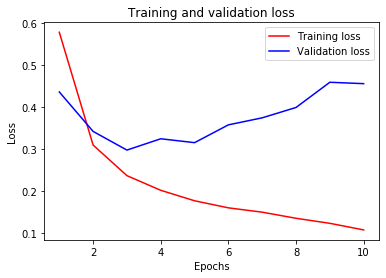

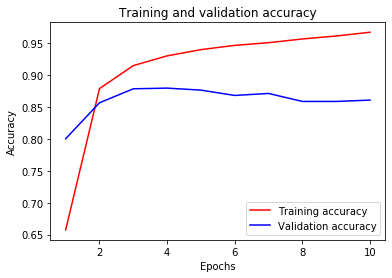

In [12]:
import matplotlib.pyplot as plt

acc = training_dict['accuracy']
val_acc = training_dict['val_accuracy']
loss = training_dict['loss']
val_loss = training_dict['val_loss']

epochs = range(1, 10 + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
